In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras import layers
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [ ]:
img_h,img_w,batch_s=250,250,100
train_d = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/kaggledata/train',
    seed=42,
    image_size= (img_h, img_w),
    batch_size=batch_s)
valid_d =  tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/kaggledata/val',
    seed=42,
    image_size= (img_h, img_w),
    batch_size=batch_s)
test_d = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/kaggledata/test',
    seed=42,
    image_size= (img_h, img_w),
    batch_size=batch_s)

Found 791 files belonging to 2 classes.
Found 98 files belonging to 2 classes.
Found 100 files belonging to 2 classes.


In [ ]:
class_n=['Accident', 'Non Accident']
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_d = train_d.cache().prefetch(buffer_size=AUTOTUNE)
test_d = test_d.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
mode=tf.keras.models.Sequential()
mode.add(tf.keras.layers.BatchNormalization())
mode.add(tf.keras.layers.Conv2D(32, 3, activation='relu'))
mode.add(tf.keras.layers.MaxPooling2D())
mode.add(tf.keras.layers.Conv2D(64, 3, activation='relu'))
mode.add(tf.keras.layers.MaxPooling2D())
mode.add(tf.keras.layers.Conv2D(128, 3, activation='relu'))
mode.add(tf.keras.layers.MaxPooling2D())
mode.add(tf.keras.layers.Conv2D(256, 3, activation='relu'))
mode.add(tf.keras.layers.MaxPooling2D())
mode.add((tf.keras.layers.Flatten()))
mode.add(tf.keras.layers.Dense(512, activation='relu'))
mode.add(tf.keras.layers.Dense(2, activation= 'softmax'))



In [ ]:
mode.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
epochs_range=10
res=mode.fit(train_d,validation_data=valid_d,epochs=epochs_range)

Epoch 1/10
8/8 [==============================] - 94s 2s/step - loss: 3.4713 - accuracy: 0.4791 - val_loss: 0.6968 - val_accuracy: 0.5306
Epoch 2/10
8/8 [==============================] - 3s 375ms/step - loss: 0.6901 - accuracy: 0.5424 - val_loss: 0.6972 - val_accuracy: 0.4796
Epoch 3/10
8/8 [==============================] - 3s 342ms/step - loss: 0.6707 - accuracy: 0.6359 - val_loss: 0.6449 - val_accuracy: 0.5918
Epoch 4/10
8/8 [==============================] - 2s 315ms/step - loss: 0.6366 - accuracy: 0.6321 - val_loss: 0.8651 - val_accuracy: 0.4898
Epoch 5/10
8/8 [==============================] - 2s 314ms/step - loss: 0.5905 - accuracy: 0.6915 - val_loss: 1.2303 - val_accuracy: 0.4898
Epoch 6/10
8/8 [==============================] - 2s 313ms/step - loss: 0.5531 - accuracy: 0.7307 - val_loss: 0.5922 - val_accuracy: 0.7143
Epoch 7/10
8/8 [==============================] - 2s 315ms/step - loss: 0.5369 - accuracy: 0.7282 - val_loss: 0.6299 - val_accuracy: 0.6531
Epoch 8/10
8/8 [======

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 250, 250, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                        

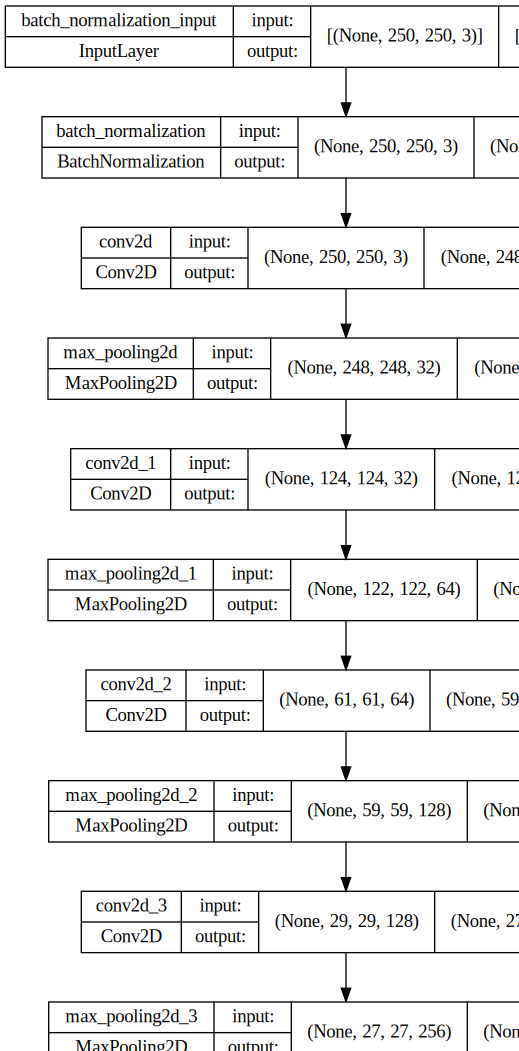

In [ ]:
mode.save('Model.h5')
# mode.layers[1].save_weights(Model.h5)
print(mode.summary())
SVG(model_to_dot(mode, show_shapes=True).create(prog='dot', format='svg'))


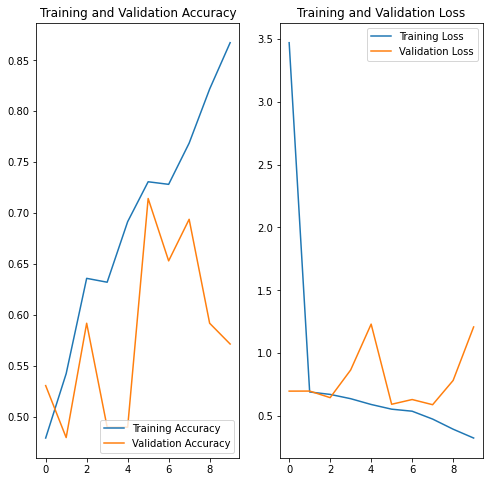

In [ ]:
acc = res.history['accuracy']
val_acc = res.history['val_accuracy']
epochs_r=range(epochs_range)
loss = res.history['loss']
val_loss = res.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_r, acc, label='Training Accuracy')
plt.plot(epochs_r, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_r, loss, label='Training Loss')
plt.plot(epochs_r, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
test_loss, test_acc = mode.evaluate(test_d, verbose=2)

1/1 - 12s - loss: 1.1712 - accuracy: 0.6100 - 12s/epoch - 12s/step


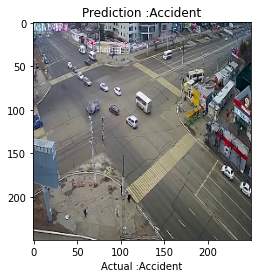

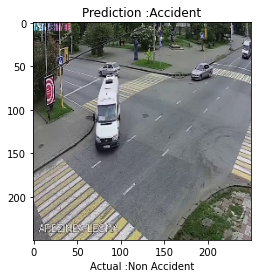

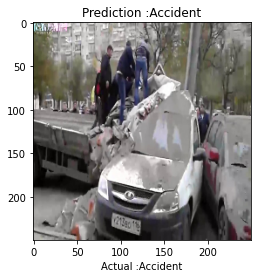

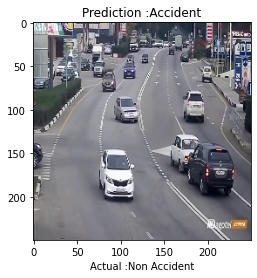

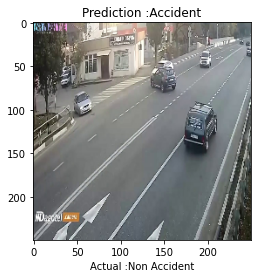

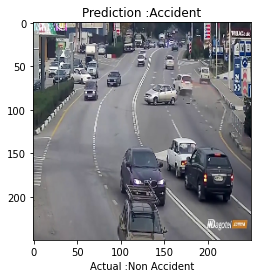

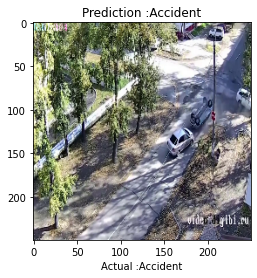

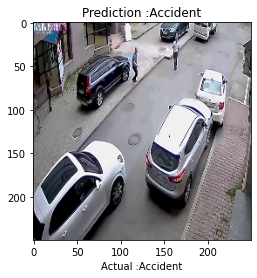

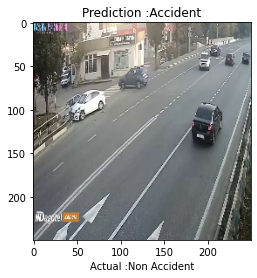

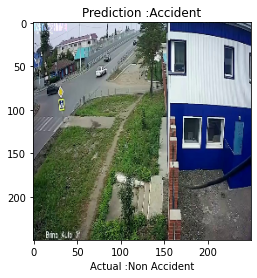

In [ ]:
prediction=mode.predict(test_d)
for images, labels in test_d.take(1):
 for i in range(10):
  plt.grid(False)
  plt.imshow(images[i].numpy().astype("uint8"))
  plt.xlabel("Actual :"+class_n[labels[i]])
  plt.title("Prediction :"+class_n[np.argmax(prediction[i])])
  plt.show()

